- **Lorrana Flores**
- **Atividade 2**
- **Disciplina PEX812.**

Importando as bibliotecas que serão usadas neste notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando o conjunto de dados

In [3]:
df = pd.read_excel('happiness.xlsx')

Considere o banco de dados (Happiness and Alcohol Consumption) extraído da Kaggle. O objetivo desta base de dados é prever o grau de felicidade de cada país (0 a 10) a partir dos indicadores IDH, PIB per capita e consumo per capita, de cerveja, drinks e vinho em cada país. O PIB per capita e o consumo de vinho forma transformado via logaritmo natural eliminando a  forte assimetria.

Utilizando algum software apropriado, responda:

###### a. Quais países são outliers em um box-plot da variável "GDP_PerCapita"?

Visualizando o perfil de distribuição da variável GDP_PerCapita


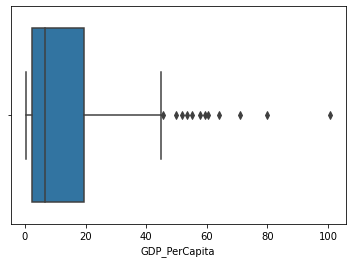

In [4]:
print('Visualizando o perfil de distribuição da variável GDP_PerCapita')
sns.boxplot(x=df['GDP_PerCapita'])
plt.show()

In [4]:
# Aqui estão os passos gerais para identificar outliers em um box-plot:
# Calcule o IQR (intervalo interquartil):
# IQR = Q3 (terceiro quartil) - Q1 (primeiro quartil)
# Calcule os limites inferior e superior:
# Limite Inferior = Q1 - 1,5 * IQR
# Limite Superior = Q3 + 1,5 * IQR
# Identifique os pontos de dados que estão abaixo do limite inferior ou acima do limite superior. 
# Esses pontos são considerados outliers.

In [5]:
# Calculando quais países correspondem aos outliers
q1 = np.percentile(df['GDP_PerCapita'], 25)
q3 = np.percentile(df['GDP_PerCapita'], 75)
iqr = q3 - q1
li = q1 - (1.5*iqr)
ls = q3 + (1.5*iqr)
df_outliers_gdp = df[['Country','GDP_PerCapita']][(df['GDP_PerCapita'] > ls)].sort_values(by='GDP_PerCapita', ascending=False)
print('GDP_PerCapita dos Países considerados outliers.')
df_outliers_gdp

GDP_PerCapita dos Países considerados outliers.


,Country,GDP_PerCapita
18,Luxembourg,100.739
1,Switzerland,79.866
3,Norway,70.890
17,Ireland,64.100
2,Iceland,60.530
32,Qatar,59.324
12,United States,57.589
20,Singapore,55.243
0,Denmark,53.579
9,Sweden,51.845


###### b. Faça uma análise descrita de todas as variáveis deste arquivo. Quais variávies têm outliers?

In [6]:
print('Tipo das variáveis presentes no dataset:')
df.dtypes

Tipo das variáveis presentes no dataset:


Country              object
Region               object
Hemisphere           object
HappinessScore      float64
HDI                   int64
GDP_PerCapita       float64
Beer_PerCapita        int64
Spirit_PerCapita      int64
Wine_PerCapita        int64
logwine             float64
loggdp              float64
dtype: object

Variáveis qualitativas:
- Country
- Region
- Hemisphere

In [7]:
# Country
ncountry = df['Country'].nunique()
print(f'O conjunto de dados possui estatísticas relativas a {ncountry} países.')

O conjunto de dados possui estatísticas relativas a 122 países.


In [8]:
# Region
nregion = df['Region'].nunique()
uregion = df['Region'].unique()
print(f'O conjunto de dados possui estatísticas relativas a {nregion} regiões do mundo.')
print('\n As regiões são:')
for i in uregion: print('-', i)
print('\n Número de países por região: \n')
df[['Country','Region']].groupby(by='Region').count()

O conjunto de dados possui estatísticas relativas a 9 regiões do mundo.

 As regiões são:
- Western Europe
- North America
- Australia and New Zealand
- Middle East and Northern Africa
- Latin America and Caribbean
- Southeastern Asia
- Central and Eastern Europe
- Eastern Asia
- Sub-Saharan Africa

 Número de países por região: 



,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,27
Eastern Asia,4
Latin America and Caribbean,23
Middle East and Northern Africa,11
North America,2
Southeastern Asia,5
Sub-Saharan Africa,28
Western Europe,20


In [5]:
# Hemisphere
df['Hemisphere'].replace('noth', 'north', inplace=True)
nhemisphere = df['Hemisphere'].unique()
print('O conjunto de dados contém países nos seguintes hemisférios')
for i in nhemisphere: print(i)
print('\n Número de países por hemisfério: \n')
df[['Country','Hemisphere']].groupby(by='Hemisphere', as_index=False).count()


O conjunto de dados contém países nos seguintes hemisférios
north
south
both

 Número de países por hemisfério: 



,Hemisphere,Country
0,both,5
1,north,96
2,south,21


Variáveis quantitativas
- HappinessScore
- HDI
- GDP_PerCapita
- Beer_PerCapita
- Wine_PerCapita
- logwine

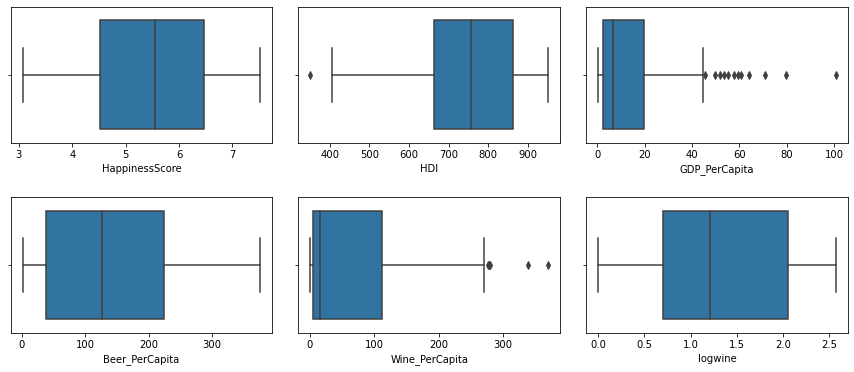

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

quant_vars = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Wine_PerCapita', 'logwine']

for i in range(len(quant_vars)):
    sns.boxplot(x=df[quant_vars[i]], ax=ax[i//3, i%3]) 

plt.show()


As variáveis que possuem outliers são: HDI, GDP_PerCapita e Wine_PerCapita

###### c. O que acontece com a assimetria e com os outliers quando é feita uma transformação logarítmica da variável Wine_PerCapita?

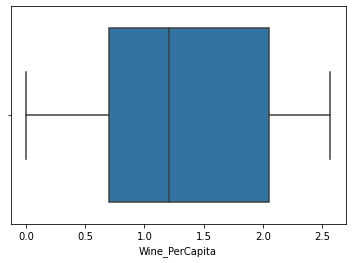

In [11]:
sns.boxplot(x=df['Wine_PerCapita'].apply(lambda x: np.log10(x)))
plt.show()

Ao aplicar os dados à escala logarítimica há um efeito de achatamento dos valores extremos.

Skewness: 1.3975190271811628
Curtose: 1.0273148610823952
Média: 66.59836065573771
Mediana: 16.0


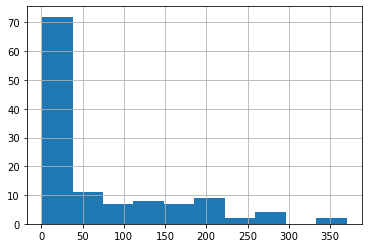

In [23]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Suponha que você tenha um DataFrame chamado 'df' com uma coluna chamada 'variavel'.
# Substitua 'df' e 'variavel' pelos nomes reais do seu DataFrame e coluna.

# Calcular a skewness (assimetria)
skewness = skew(df['Wine_PerCapita'])
print(f'Skewness: {skewness}')

# Calcular a curtose (aplatisse)
curtose = kurtosis(df['Wine_PerCapita'])
print(f'Curtose: {curtose}')

mean_wine = df['Wine_PerCapita'].mean()
print(f'Média: {mean_wine}')

median_wine = df['Wine_PerCapita'].median()
print(f'Mediana: {median_wine}')
      

df['Wine_PerCapita'].hist()

plt.show()

Antes da transformação, nota-se que a assimetria está fortemente direcionada à direita (assimetria = 1.4)

Skewness: -0.08020256036695608
Curtose: -1.2705858693584953
Média: 1.2663276646221029
Mediana: 1.2041199826559248


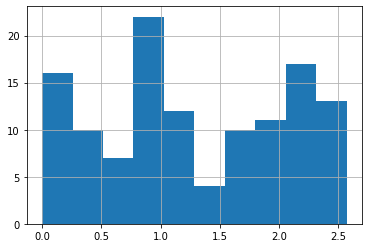

In [27]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Suponha que você tenha um DataFrame chamado 'df' com uma coluna chamada 'variavel'.
# Substitua 'df' e 'variavel' pelos nomes reais do seu DataFrame e coluna.

# Calcular a skewness (assimetria)
skewness = skew(df['logwine'])
print(f'Skewness: {skewness}')

# Calcular a curtose (aplatisse)
curtose = kurtosis(df['logwine'])
print(f'Curtose: {curtose}')

mean_logwine = df['logwine'].mean()
print(f'Média: {mean_logwine}')

median_logwine = df['logwine'].median()
print(f'Mediana: {median_logwine}')

df['logwine'].hist()

plt.show()

Após a transformação a variável assume uma distribuição aproximadamente simétrica (assimetria=0.08)

###### d. Há erros na variável "Hemisphere". Corrija os erros utlizando a sintaxe R (ou Python).

Os erros foram corrigidos anteriormente quando foram contabilizados o número de países por Hemisfério.

###### e. Após corrigir os erros da variável "Hemisphere", mostre por meio de box-plots se há diferenças na distribuição "HappinessScore" nos países do hemisfério norte e sul. 

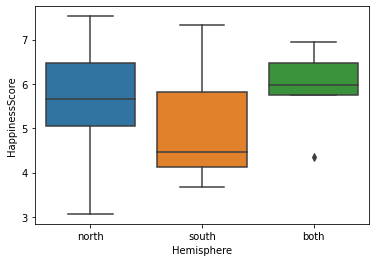

In [12]:
sns.boxplot(y='HappinessScore', x='Hemisphere', data=df) 

plt.show()

Sim, há diferença na distribuição do HappinessScore por hemisfério.

###### f. Qual é a correlação entre "HappinesseScore" e "Wine_PerCapita"? Interprete este valor. Refaça os cálculos agora utilizando o logaritmo das duas variáveis. Comente as diferenças entre as correlações. 

Correlação:
                HappinessScore  Wine_PerCapita
HappinessScore        1.000000        0.450589
Wine_PerCapita        0.450589        1.000000

 Gráfico de dispersão


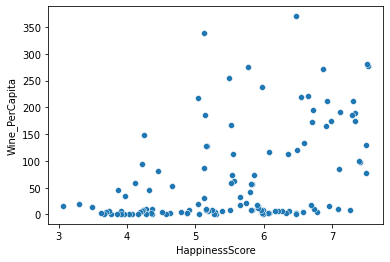

In [31]:
print('Correlação:')
print(df[['HappinessScore','Wine_PerCapita']].corr())

print('\n Gráfico de dispersão')
sns.scatterplot(data=df, x='HappinessScore' ,y='Wine_PerCapita')
plt.show()

                   HappinessScoreLog  Wine_PerCapitaLog
HappinessScoreLog           1.000000           0.466498
Wine_PerCapitaLog           0.466498           1.000000


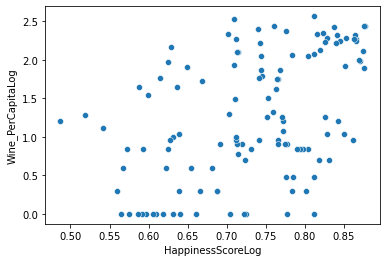

In [32]:
df['HappinessScoreLog'] = df['HappinessScore'].apply(lambda x: np.log10(x))
df['Wine_PerCapitaLog'] = df['Wine_PerCapita'].apply(lambda x: np.log10(x))
print(df[['HappinessScoreLog','Wine_PerCapitaLog']].corr())
sns.scatterplot(data=df, x='HappinessScoreLog' ,y='Wine_PerCapitaLog')
plt.show()

In [15]:
ganho_corr = round(((0.466498 / 0.450589) -1) * 100)

print(f'O tratamento das variáveis por meio de escala logaritimica proporcionou um ganho de {ganho_corr}% na correlação entre as variáveis.')

O tratamento das variáveis por meio de escala logaritimica proporcionou um ganho de 4% na correlação entre as variáveis.


###### g. Podemos dizer que há relação de causalidade entre as duas variáveis, isto é, consumo de cerveja 'causa" aumento do escore de felicidade?

In [16]:
print(df[['Beer_PerCapita','HappinessScore']].corr())

                Beer_PerCapita  HappinessScore
Beer_PerCapita        1.000000        0.493367
HappinessScore        0.493367        1.000000


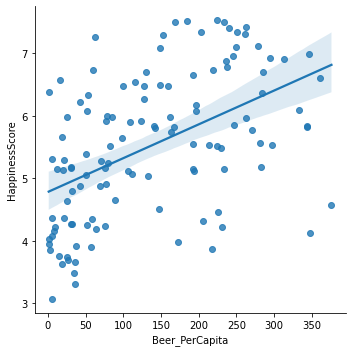

In [17]:
sns.lmplot(x='Beer_PerCapita', y='HappinessScore', data=df)
plt.show()

Não, podemos dizer que há uma tendência observada de uma correlação positiva entre as variáveis, embora fraca (0.4934).